# Using Linear Regression to predict salaries

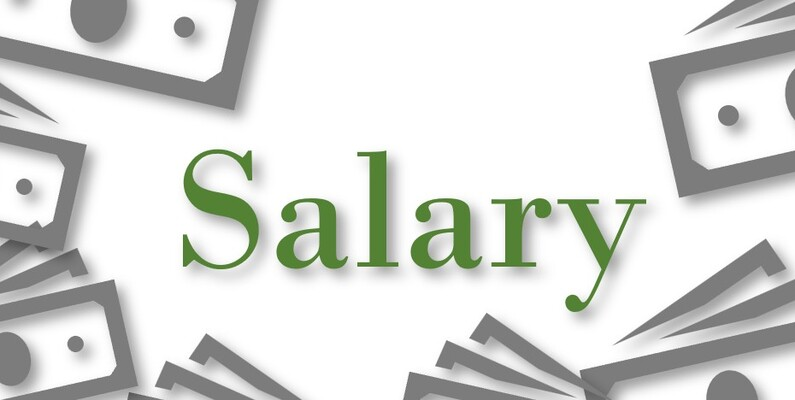

**Problem Statement**

*Topboy Enterprise, an innovative Information and Technology company providing technological solutions, is currently facing the risk of decline. To proactively address this issue, the company has been recommended to implement effective planning and budgeting strategies. To facilitate this process, the company intends to utilize linear regression analysis to predict employees' salaries as a critical aspect of its financial planning and resource allocation efforts. By accurately forecasting salaries, Topboy Enterprise aims to optimize its compensation strategies and streamline budgeting practices, ensuring the company's long-term sustainability and success in the ever-evolving tech industry.*

**About the Dataset**


The dataset was gotten from kaggle , a cloud-based platform that hosts a large amount of data and it contained the following keys:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.  

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eniolaadetunji","key":"80750ff4e2b9d173f8240ef3e3062c46"}'}

In [3]:
! rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json to ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
mv: cannot stat 'to': No such file or directory
ref                                                          title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                      Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          27730        838  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset           Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           2688         67  1.0              
joebeachcapital/seoul-bike-sharing                           Seoul Bike Sharing Demand                         126KB  2023-10-03 01:48:46            649       

In [4]:
!kaggle datasets download -d rkiattisak/salaly-prediction-for-beginer

  0% 0.00/3.20k [00:00<?, ?B/s]
100% 3.20k/3.20k [00:00<00:00, 10.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/salaly-prediction-for-beginer.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
df = pd.read_csv('/content/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
# Exploring the data
df.keys()

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

The data columns are : Age, Gender, Educational Level, Job title , Years of Experience and Salary

In [8]:
df.shape

(375, 6)

The data has 375 rows and 6 columns

In [9]:
# checking the data types
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [10]:
# checking null values
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Each column has two null values

In [11]:
# checking for duplicates
df.duplicated().sum()

50

50 duplicate values found

In [12]:
# removing duplicate values
df = df.drop_duplicates()

In [13]:
df.shape

(325, 6)

In [14]:
# handling missing data (writing a for loop to fill missing values in each column with the mode of the columns)

columns_with_null = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

for column in columns_with_null:
    mode = df[column].mode().iloc[0]
    df[column] = df[column].fillna(mode)

In [15]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Null values have been removed

In [16]:
# Statistical summary
df.describe()

,Age,Years of Experience,Salary
count,325.000000,325.000000,325.000000
mean,37.356923,10.036923,99801.076923
std,7.189798,6.651733,48690.958617
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


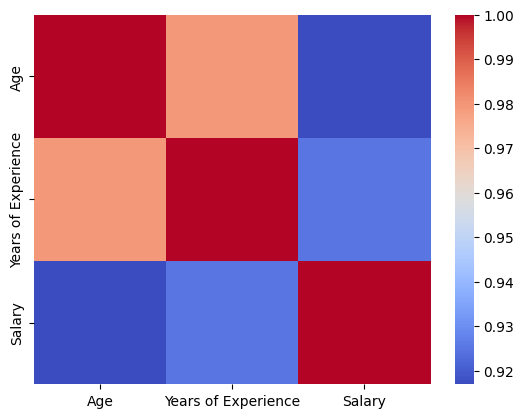

In [17]:
# correlational analysis
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(data = corr_matrix,cmap = 'coolwarm')
plt.show()

Quick EDA

In [18]:
#changing some dtypes
df['Age'] = df['Age'].astype(int)

In [ ]:
df.dtypes

Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

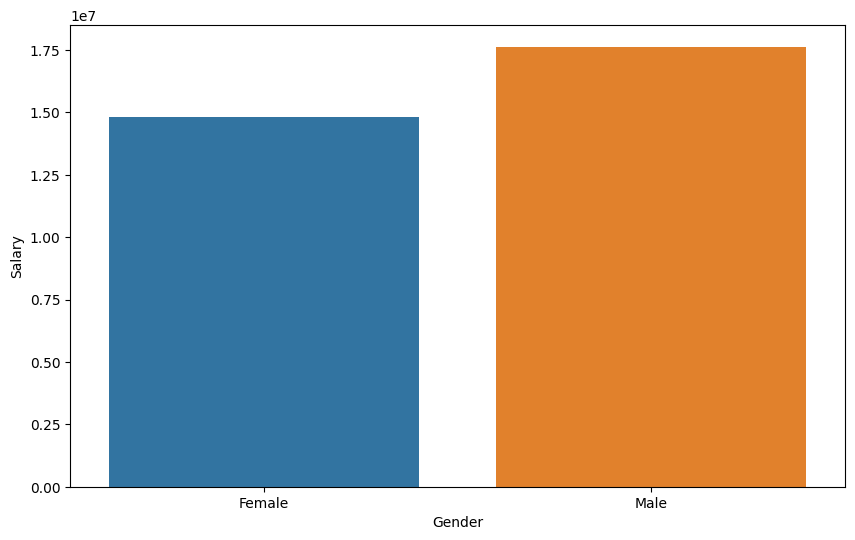

In [19]:
# salary by gender
sg = df.groupby('Gender')['Salary'].sum().reset_index()
plt.figure(figsize =(10,6))
sns.barplot(data = sg, x = 'Gender',y = 'Salary')
plt.show()

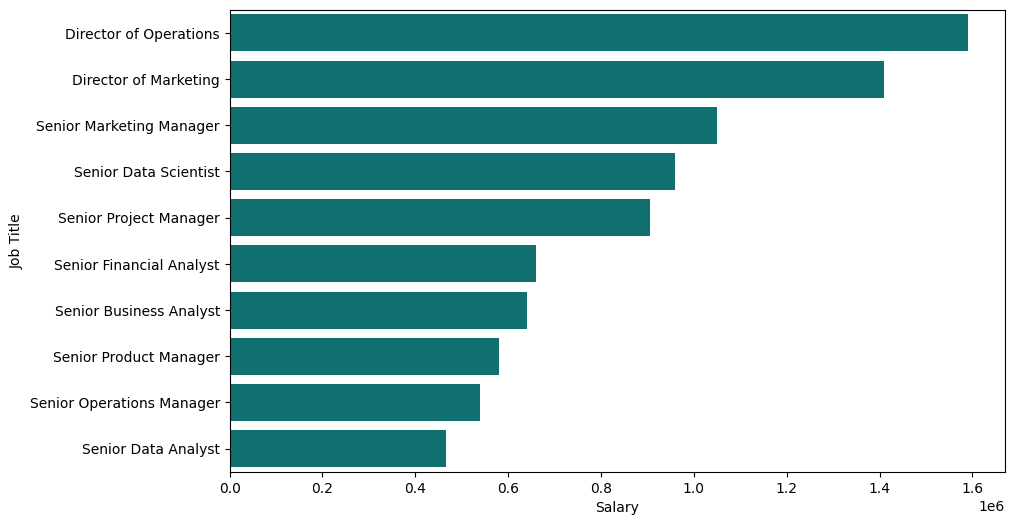

In [20]:
# top 10 job titles by salary
sj = df.groupby('Job Title')['Salary'].sum().reset_index()
top_sj = sj.sort_values(by = 'Salary',ascending = False)
top_10_sj = top_sj.head(10)
plt.figure(figsize =(10,6))
sns.barplot(data = top_10_sj, x = 'Salary',y = 'Job Title',color = 'teal')
plt.show()

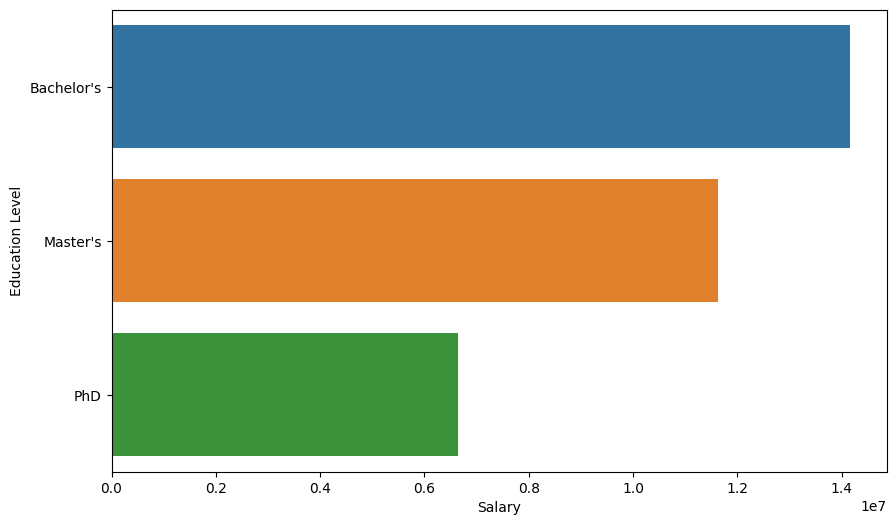

In [21]:
# salary by educational level
sed = df.groupby('Education Level')['Salary'].sum().reset_index()
plt.figure(figsize =(10,6))
sns.barplot(data = sed, x = 'Salary',y = 'Education Level')
plt.show()

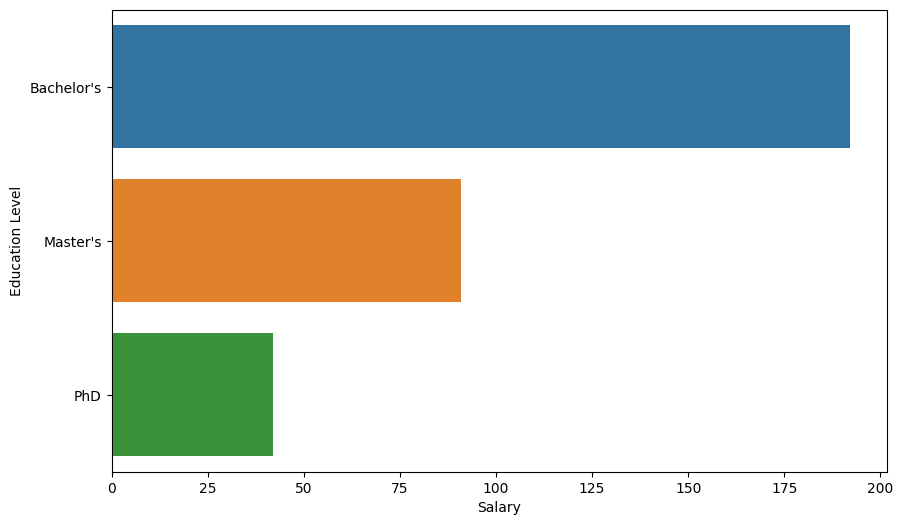

In [22]:
# count of employees by Educational level
sed1 = df.groupby('Education Level')['Salary'].count().reset_index()
plt.figure(figsize =(10,6))
sns.barplot(data = sed1, x = 'Salary',y = 'Education Level')
plt.show()

In [23]:
df[['Years of Experience','Salary']] = df[['Years of Experience','Salary']].astype(int)  # Just to make the plot look cleaner

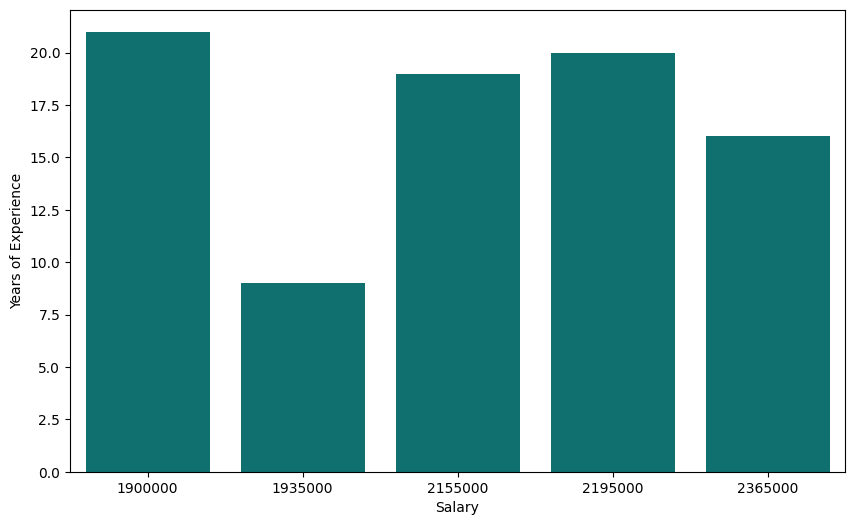

In [24]:
# Salary by years of experience
sye = df.groupby('Years of Experience')['Salary'].sum().reset_index()
top_sye = sye.sort_values(by = 'Salary',ascending = False)
top_5_sye= top_sye.head(5)
plt.figure(figsize =(10,6))
sns.barplot(data = top_5_sye, x = 'Salary',y = 'Years of Experience',color = 'teal')
plt.show()


Data Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
columns_to_be_encoded = ['Gender','Education Level','Job Title']

In [27]:
le = LabelEncoder()

In [28]:
for column in columns_to_be_encoded:
  df[column] = le.fit_transform(df[column])

<Axes: >

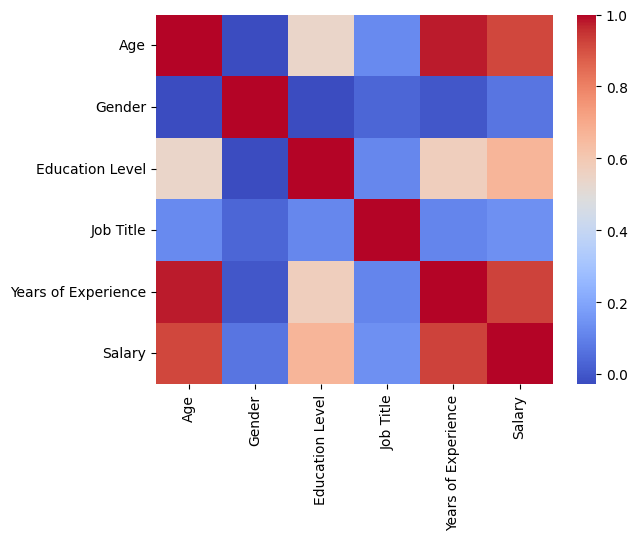

In [29]:
# Taking the correlation again

corr2 = df.corr()
corr2
sns.heatmap(corr2, cmap = 'coolwarm')

In [30]:
# Feature selection
x = df.drop('Salary',axis = 1)
y = df['Salary']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
model = lr.fit(x_train_scaled,y_train)

In [39]:
y_pred = model.predict(x_test_scaled)

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

158235969.44481927

In [42]:
rmse = np.sqrt(mse)
rmse

12579.18794854498

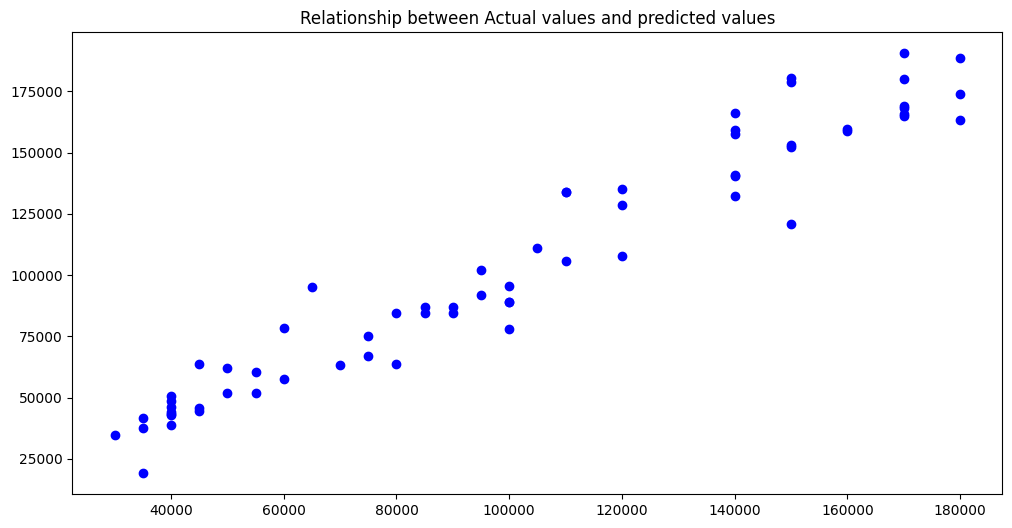

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.title('Relationship between Actual values and predicted values')
plt.show()

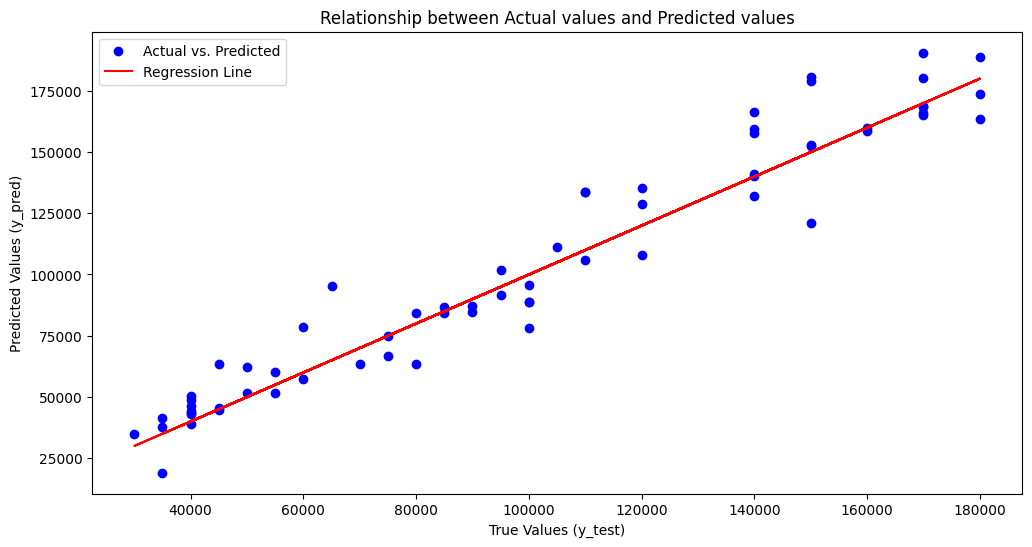

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope * y_test
plt.plot(y_test, regression_line, c='red', label='Regression Line')

plt.title('Relationship between Actual values and Predicted values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred)
R_squared


0.9306853250972659

R- squared score is 0.93 indicating that the model is a good fit for the data
